In [7]:
import pandas as pd
df =pd.read_csv('../data/fault_nev_dataset.csv')
df.head()

,battery_voltage,battery_current,engine_temperature,motor_efficiency,tire_pressure,fuel_efficiency,speed,acceleration,driving_distance,ambient_temperature,humidity,road_condition,last_service_distance,service_frequency,repair_cost,downtime,fault_type,time_since_last_fault
0,12.623620,11.479653,83.085284,93.454060,35.719959,13.936355,77.790834,0.116398,360.133962,35.678901,46.154857,Hilly,14137.962594,5000,200,1,sensor_malfunction,3
1,14.352143,23.966533,82.348940,95.933628,38.054323,14.734357,20.686363,0.560318,343.641502,16.268024,43.303847,Smooth,7157.749964,15000,200,1,engine_overheating,4
2,13.695982,35.553104,115.312729,85.009358,37.601609,18.545474,104.687348,2.493737,47.877099,26.245514,32.330774,Smooth,5435.949218,5000,100,1,engine_overheating,10
3,13.295975,30.627871,82.477310,92.497482,31.538999,13.400044,73.573949,2.300305,461.286202,11.802415,62.508667,Bumpy,8054.105310,10000,200,2,battery_issue,1
4,11.968056,33.229640,83.597486,91.434920,31.492495,18.696497,18.864466,1.051928,284.236101,21.501729,53.363691,Hilly,11958.023148,10000,200,2,no_fault,11


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_voltage        1000 non-null   float64
 1   battery_current        1000 non-null   float64
 2   engine_temperature     1000 non-null   float64
 3   motor_efficiency       1000 non-null   float64
 4   tire_pressure          1000 non-null   float64
 5   fuel_efficiency        1000 non-null   float64
 6   speed                  1000 non-null   float64
 7   acceleration           1000 non-null   float64
 8   driving_distance       1000 non-null   float64
 9   ambient_temperature    1000 non-null   float64
 10  humidity               1000 non-null   float64
 11  road_condition         1000 non-null   object 
 12  last_service_distance  1000 non-null   float64
 13  service_frequency      1000 non-null   int64  
 14  repair_cost            1000 non-null   int64  
 15  downt

,battery_voltage,battery_current,engine_temperature,motor_efficiency,tire_pressure,fuel_efficiency,speed,acceleration,driving_distance,ambient_temperature,humidity,last_service_distance,service_frequency,repair_cost,downtime,time_since_last_fault
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.970770,22.745606,95.120286,89.807501,34.941053,14.984645,59.197061,1.447112,243.248346,14.839749,55.398422,10079.262230,10060.000000,207.200000,1.805000,6.052000
std,0.876412,10.226646,14.533710,5.729787,2.868099,2.891948,34.768037,0.854743,141.117262,14.107662,20.051710,2902.028207,4020.268966,120.260645,0.979763,3.206802
min,11.513896,5.112639,70.000582,80.013068,30.000307,10.061838,0.171401,0.000723,0.121467,-9.997359,20.066013,5013.146334,5000.000000,100.000000,1.000000,1.000000
25%,12.207920,13.437599,83.067549,84.838015,32.449740,12.493800,28.826600,0.707968,124.691856,3.207206,37.684168,7568.843394,5000.000000,100.000000,1.000000,3.000000
50%,12.990422,23.155687,95.030696,89.685586,34.945981,14.904028,58.157163,1.451972,239.350476,14.759340,55.445628,10185.833939,10000.000000,200.000000,2.000000,6.000000
75%,13.732959,31.616277,107.955176,94.750816,37.399935,17.398518,90.775722,2.143399,357.952487,26.810862,72.969150,12572.818325,15000.000000,300.000000,2.000000,9.000000
max,14.499153,39.979480,119.891043,99.991154,39.977494,19.993503,119.935282,2.996714,498.006392,39.975259,89.977124,14990.907678,15000.000000,500.000000,4.000000,11.000000


In [9]:
df.isnull().sum()




battery_voltage          0
battery_current          0
engine_temperature       0
motor_efficiency         0
tire_pressure            0
fuel_efficiency          0
speed                    0
acceleration             0
driving_distance         0
ambient_temperature      0
humidity                 0
road_condition           0
last_service_distance    0
service_frequency        0
repair_cost              0
downtime                 0
fault_type               0
time_since_last_fault    0
dtype: int64

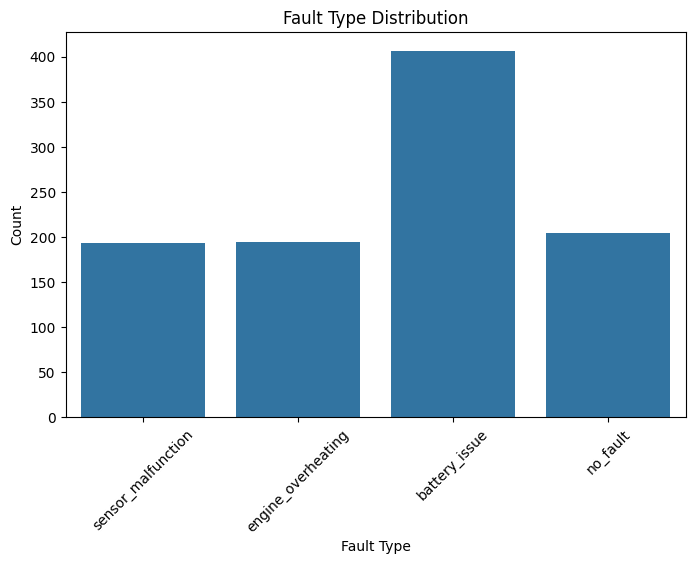

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='fault_type',data=df)
plt.title('Fault Type Distribution')
plt.xticks(rotation=45)
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.show()




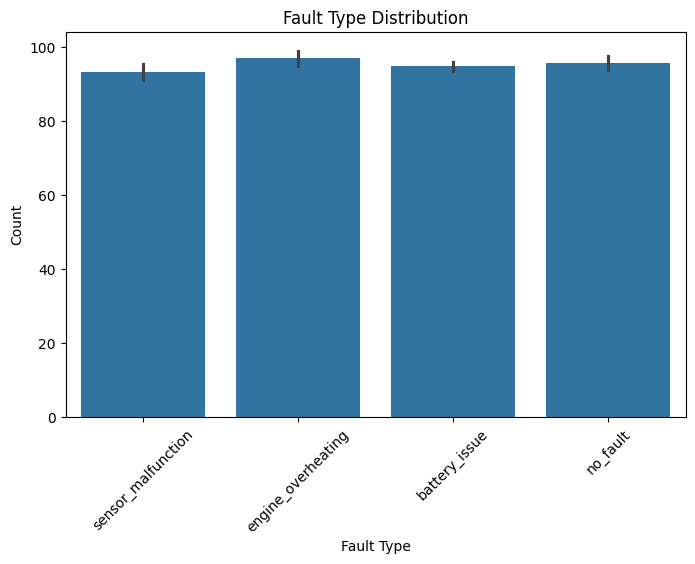

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='fault_type',data=df,y='engine_temperature')
plt.title('Fault Type Distribution')
plt.xticks(rotation=45)
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

le_road = LabelEncoder()
df_encoded['road_condition'] = le_road.fit_transform(df_encoded['road_condition'])


le_fault = LabelEncoder()
df_encoded['fault_type'] = le_fault.fit_transform(df_encoded['fault_type'])


In [13]:
x=df_encoded.drop('fault_type',axis=1)
y=df_encoded['fault_type']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)








In [14]:
x

,battery_voltage,battery_current,engine_temperature,motor_efficiency,tire_pressure,fuel_efficiency,speed,acceleration,driving_distance,ambient_temperature,humidity,road_condition,last_service_distance,service_frequency,repair_cost,downtime,time_since_last_fault
0,12.623620,11.479653,83.085284,93.454060,35.719959,13.936355,77.790834,0.116398,360.133962,35.678901,46.154857,1,14137.962594,5000,200,1,3
1,14.352143,23.966533,82.348940,95.933628,38.054323,14.734357,20.686363,0.560318,343.641502,16.268024,43.303847,2,7157.749964,15000,200,1,4
2,13.695982,35.553104,115.312729,85.009358,37.601609,18.545474,104.687348,2.493737,47.877099,26.245514,32.330774,2,5435.949218,5000,100,1,10
3,13.295975,30.627871,82.477310,92.497482,31.538999,13.400044,73.573949,2.300305,461.286202,11.802415,62.508667,0,8054.105310,10000,200,2,1
4,11.968056,33.229640,83.597486,91.434920,31.492495,18.696497,18.864466,1.051928,284.236101,21.501729,53.363691,1,11958.023148,10000,200,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.774746,27.993430,113.264788,88.842141,38.973973,16.844354,69.568454,0.819479,257.464748,32.882799,45.161152,2,10052.553903,5000,300,1,11
996,14.251941,38.481512,77.863660,86.688024,31.193810,15.032204,80.044423,0.628558,82.685213,34.875442,84.869525,1,7473.446711,15000,300,3,5
997,11.910456,7.413531,85.489393,87.891446,33.278428,17.651488,109.389226,1.365986,488.856406,37.335396,68.905989,1,9013.480042,5000,100,1,6
998,14.350712,6.996915,84.502277,90.598812,38.157454,14.852906,41.474420,2.725313,53.962277,9.874400,38.002400,2,12188.640729,5000,100,1,4


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
y_pred=model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_fault.classes_))


Classification Report:
                     precision    recall  f1-score   support

     battery_issue       0.37      0.89      0.53        76
engine_overheating       0.27      0.09      0.13        34
          no_fault       0.50      0.04      0.08        48
sensor_malfunction       0.00      0.00      0.00        42

          accuracy                           0.36       200
         macro avg       0.29      0.26      0.18       200
      weighted avg       0.31      0.36      0.24       200



it is very bad

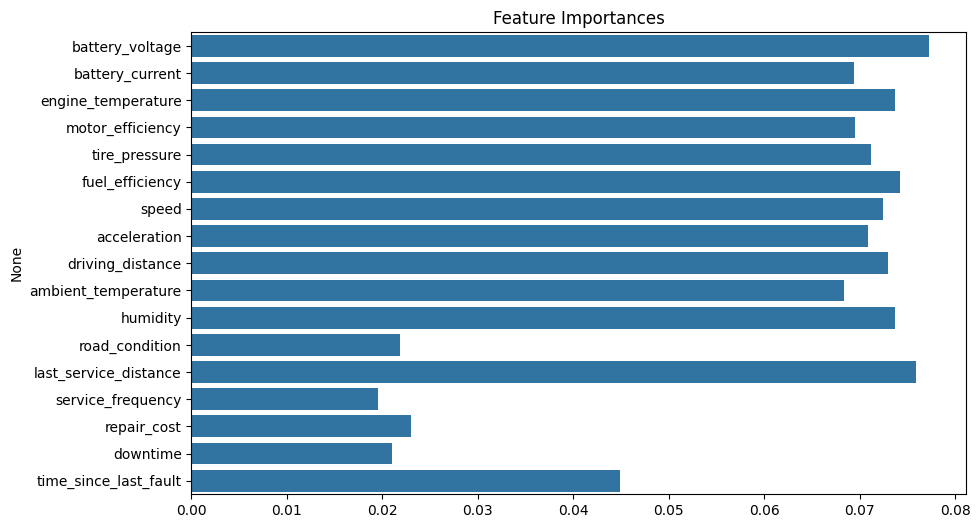

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
importances = model.feature_importances_
features = x.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()



In [26]:


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)


smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
from collections import Counter 
Counter(y_train_resampled)


Counter({1: 326, 0: 326, 3: 326, 2: 326})

In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)



RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=le_fault.classes_))

                    precision    recall  f1-score   support

     battery_issue       0.38      0.52      0.44        81
engine_overheating       0.11      0.10      0.11        39
          no_fault       0.26      0.15      0.19        41
sensor_malfunction       0.21      0.15      0.18        39

          accuracy                           0.29       200
         macro avg       0.24      0.23      0.23       200
      weighted avg       0.27      0.29      0.27       200



it is bad

In [39]:
# !pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=3, 
    n_estimators=200,
    subsample=0.8
)
xgb.fit(x_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb, target_names=le_fault.classes_))


                    precision    recall  f1-score   support

     battery_issue       0.40      0.47      0.43        81
engine_overheating       0.23      0.18      0.20        39
          no_fault       0.15      0.12      0.14        41
sensor_malfunction       0.25      0.26      0.25        39

          accuracy                           0.30       200
         macro avg       0.26      0.26      0.25       200
      weighted avg       0.28      0.30      0.29       200



In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
